<a href="https://colab.research.google.com/github/atal5/ML_DL_CLASS/blob/master/RNN_LSTM_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#load and plot dataset
from pandas import read_csv
from pandas import datetime
from pandas import Series
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [8]:
neurons_n = 3
input_shape = (None,2)

def make_bare_model():
  model = Sequential()
  model.add(SimpleRNN(units=neurons_n,activation='tanh',input_shape=input_shape,batch_input_shape=(1,input_shape[0],
                                                                                                  input_shape[1]),stateful=True))
  model.compile(loss='categorical_crossentropy',optimizer='sgd')
  return model

model_try = make_bare_model()
print(model_try.summary())
model_try_weights = np.array(model_try.layers[0].get_weights())
print('All weights:\n',model_try_weights)
print('Input matrix: \n',model_try_weights[0])
print('Recurrent matrix:\n',model_try_weights[1])
print('Bias Matrix:\n',model_try_weights[2])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (1, 3)                    18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
All weights:
 [array([[-0.8199116 , -0.35660815, -0.31132495],
       [-1.0146837 ,  0.4108243 , -0.6700217 ]], dtype=float32)
 array([[-0.99931246, -0.0212801 ,  0.03036079],
       [-0.01548035, -0.50460565, -0.86321115],
       [ 0.03368944, -0.86308765,  0.5039293 ]], dtype=float32)
 array([0., 0., 0.], dtype=float32)]
Input matrix: 
 [[-0.8199116  -0.35660815 -0.31132495]
 [-1.0146837   0.4108243  -0.6700217 ]]
Recurrent matrix:
 [[-0.99931246 -0.0212801   0.03036079]
 [-0.01548035 -0.50460565 -0.86321115]
 [ 0.03368944 -0.86308765  0.5039293 ]]
Bias Matrix:
 [0. 0. 0.]


In [4]:
model_try = make_bare_model()
print(model_try.summary())
model_try_weights = np.array(model_try.layers[0].get_weights())
print('All weights:\n',model_try_weights)
print('Input matrix: \n',model_try_weights[0])
print('Recurrent matrix:\n',model_try_weights[1])
print('Bias Matrix:\n',model_try_weights[2])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (1, 3)                    18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
All weights:
 [array([[-0.37387282, -1.0868225 , -0.3328815 ],
       [-0.5118341 , -0.95493406, -0.6631711 ]], dtype=float32)
 array([[-0.376113  , -0.42196137, -0.8249167 ],
       [ 0.4532187 ,  0.69273645, -0.5609893 ],
       [ 0.8081657 , -0.58486307, -0.06930643]], dtype=float32)
 array([0., 0., 0.], dtype=float32)]
Input matrix: 
 [[-0.37387282 -1.0868225  -0.3328815 ]
 [-0.5118341  -0.95493406 -0.6631711 ]]
Recurrent matrix:
 [[-0.376113   -0.42196137 -0.8249167 ]
 [ 0.4532187   0.69273645 -0.5609893 ]
 [ 0.8081657  -0.58486307 -0.06930643]]
Bias Matrix:
 [0. 0. 0.]


Structure of weights LSTM

Create a simple LSTM model and observe the structure of its weights

In [10]:
neurons_n=3
input_shape=(None,2)
def make_bare_lstm_model():
  model=Sequential()
  model.add(LSTM(units=neurons_n,activation='tanh',input_shape=input_shape,batch_input_shape=(1,input_shape[0],
                                                                                             input_shape[1]),stateful=True))
  model.compile(loss='categorical_crossentropy',optimizer='sgd')
  return model

model_lstm_try = make_bare_lstm_model()
print(model_lstm_try.summary())
model_lstm_try_weights= np.array(model_lstm_try.layers[0].get_weights())
print('\nInput matrix:\n',model_lstm_try_weights[0])
print('Recurrent matrix:\n',model_lstm_try_weights[1])
print('Bias matrix:\n',model_lstm_try_weights[2])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (1, 3)                    72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________
None

Input matrix:
 [[-0.6106925   0.32927722  0.18751156 -0.5758545   0.27195686  0.5532975
  -0.17211476 -0.39725685 -0.19682842  0.30238998 -0.43396896 -0.35460475]
 [ 0.61210227  0.46791732 -0.07560062 -0.11806732 -0.18236995 -0.3668161
  -0.36989918  0.634099   -0.3880724   0.02955574  0.37892866  0.4564402 ]]
Recurrent matrix:
 [[-0.7386655  -0.11055728 -0.0770907  -0.37419266 -0.00763846 -0.36423153
   0.14128934 -0.189245   -0.11126728  0.01184411 -0.25555235  0.17280103]
 [-0.14937545 -0.10799944  0.3019775   0.23100296 -0.30329284  0.15944515
  -0.19480745 -0.3327465  -0.6792609   0.0575586   0.2978909   0.0440853 ]
 [-0.38548356 -0.31537697 -0.02970074  

In [12]:
W = model_lstm_try.layers[0].get_weights()[0] #input 
U = model_lstm_try.layers[0].get_weights()[1] #recurrent
b = model_lstm_try.layers[0].get_weights()[2] #bias

print(W)
print(W.shape)
print(U)
print(U.shape)
print(b)
print(b.shape)

[[-0.6106925   0.32927722  0.18751156 -0.5758545   0.27195686  0.5532975
  -0.17211476 -0.39725685 -0.19682842  0.30238998 -0.43396896 -0.35460475]
 [ 0.61210227  0.46791732 -0.07560062 -0.11806732 -0.18236995 -0.3668161
  -0.36989918  0.634099   -0.3880724   0.02955574  0.37892866  0.4564402 ]]
(2, 12)
[[-0.7386655  -0.11055728 -0.0770907  -0.37419266 -0.00763846 -0.36423153
   0.14128934 -0.189245   -0.11126728  0.01184411 -0.25555235  0.17280103]
 [-0.14937545 -0.10799944  0.3019775   0.23100296 -0.30329284  0.15944515
  -0.19480745 -0.3327465  -0.6792609   0.0575586   0.2978909   0.0440853 ]
 [-0.38548356 -0.31537697 -0.02970074  0.62507445  0.17753853  0.29906282
   0.20001619  0.01686761  0.13320564 -0.32086962 -0.1966962  -0.19924757]]
(3, 12)
[0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
(12,)


In [15]:
#i(nput), f(orget), c(ell), o(utput)

W_i = W[:,:neurons_n]
W_f = W[:,neurons_n:neurons_n*2]
W_c = W[:,neurons_n*2:neurons_n*3]
W_o = W[:,neurons_n*3:]

U_i = U[:,:neurons_n]
U_f = U[:,neurons_n:neurons_n*2]
U_c = U[:,neurons_n*2:neurons_n*3]
U_o = U[:,neurons_n*3:]

b_i = b[:neurons_n]
b_f = b[neurons_n:neurons_n*2]
b_c = b[neurons_n*2:neurons_n*3]
b_o = b[neurons_n*3:]


print('\nW_i:\n',W_i)
print('\nW_f:\n',W_f)
print('\nW_c:\n',W_c)
print('\nW_o:\n',W_o)

print('\nU_i:\n',U_i)
print('\nU_f:\n',U_f)
print('\nU_c:\n',U_c)
print('\nU_o:\n',U_o)

print('\nb_i:\n',b_i)
print('\nb_f:\n',b_f)
print('\nb_c:\n',b_c)
print('\nb_o:\n',b_o)



W_i:
 [[-0.6106925   0.32927722  0.18751156]
 [ 0.61210227  0.46791732 -0.07560062]]

W_f:
 [[-0.5758545   0.27195686  0.5532975 ]
 [-0.11806732 -0.18236995 -0.3668161 ]]

W_c:
 [[-0.17211476 -0.39725685 -0.19682842]
 [-0.36989918  0.634099   -0.3880724 ]]

W_o:
 [[ 0.30238998 -0.43396896 -0.35460475]
 [ 0.02955574  0.37892866  0.4564402 ]]

U_i:
 [[-0.7386655  -0.11055728 -0.0770907 ]
 [-0.14937545 -0.10799944  0.3019775 ]
 [-0.38548356 -0.31537697 -0.02970074]]

U_f:
 [[-0.37419266 -0.00763846 -0.36423153]
 [ 0.23100296 -0.30329284  0.15944515]
 [ 0.62507445  0.17753853  0.29906282]]

U_c:
 [[ 0.14128934 -0.189245   -0.11126728]
 [-0.19480745 -0.3327465  -0.6792609 ]
 [ 0.20001619  0.01686761  0.13320564]]

U_o:
 [[ 0.01184411 -0.25555235  0.17280103]
 [ 0.0575586   0.2978909   0.0440853 ]
 [-0.32086962 -0.1966962  -0.19924757]]

b_i:
 [0. 0. 0.]

b_f:
 [1. 1. 1.]

b_c:
 [0. 0. 0.]

b_o:
 [0. 0. 0.]


## Prediction of Time Series

### Data Preparation

In [0]:
#parser function to make date formats of type 'YYYY-MM-DD'

def parser(x):
  return datetime.strptime('200' + x, '%Y-%m')

In [19]:
!wget https://github.com/atal5/ML_DL_CLASS/blob/master/documents-MachineLearning_iLykei-DeepLearningModels-sales-of-shampoo-over-a-three-ye.csv

--2019-05-27 23:24:47--  https://github.com/atal5/ML_DL_CLASS/blob/master/documents-MachineLearning_iLykei-DeepLearningModels-sales-of-shampoo-over-a-three-ye.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-05-27 23:24:47 ERROR 404: Not Found.



In [0]:
url_for_data = 'https://raw.githubusercontent.com/atal5/ML_DL_CLASS/master/documents-MachineLearning_iLykei-DeepLearningModels-sales-of-shampoo-over-a-three-ye.csv?token=ALLJKZE3HQK6GNH2W5FCSWS46WWHU'

Shampoo sales data:
 Month
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

Shampoo sales data length:  36 



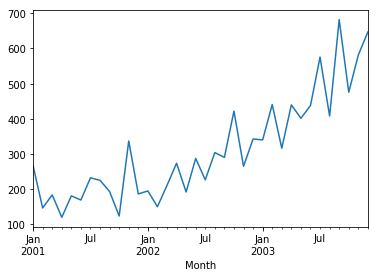

In [24]:
series=read_csv(url_for_data,header=0,parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
print('Shampoo sales data:\n',series.head())
print('\nShampoo sales data length: ',len(series),'\n')
series.plot()
plt.show()

Create monthly increments

In [25]:
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return Series(diff)

raw_values = series.values
diff_values = difference(raw_values,1)
print('Raw values: ',raw_values,'\nDifferencies:\n',diff_values[:10])

Raw values:  [266.  145.9 183.1 119.3 180.3 168.5 231.8 224.5 192.8 122.9 336.5 185.9
 194.3 149.5 210.1 273.3 191.4 287.  226.  303.6 289.9 421.6 264.5 342.3
 339.7 440.4 315.9 439.3 401.3 437.4 575.5 407.6 682.  475.3 581.3 646.9] 
Differencies:
 0   -120.1
1     37.2
2    -63.8
3     61.0
4    -11.8
5     63.3
6     -7.3
7    -31.7
8    -69.9
9    213.6
dtype: float64


In [26]:
len(raw_values)

36

In [27]:
len(diff_values)

35

In [0]:
#Define main parameters
n_lag=1
n_epochs = 1000
n_batch = 4
n_neurons = 3

Convert the time series to a data set for supervised learning, i.e. make the response column of sales increments one month ahead

In [29]:
def timeseries_to_supervised(data, lag=1):
  df = DataFrame(data)
  columns = [df.shift(i) for i in range(1, lag +1)]
  columns.append(df)
  df = concat(columns,axis=1)
  return df

df_supervised = timeseries_to_supervised(diff_values,lag=n_lag)
df_supervised_values = df_supervised.values[n_lag:]
print(df_supervised_values[:10])

[[-120.1   37.2]
 [  37.2  -63.8]
 [ -63.8   61. ]
 [  61.   -11.8]
 [ -11.8   63.3]
 [  63.3   -7.3]
 [  -7.3  -31.7]
 [ -31.7  -69.9]
 [ -69.9  213.6]
 [ 213.6 -150.6]]


In [31]:
#Split supervised data into train and test. This is a time series, so test is selected as last 12 months
train, test = df_supervised_values[0:-12], df_supervised_values[-12:]
print("Train: \n", train[:10], '\nTest: \n', test[:10])

Train: 
 [[-120.1   37.2]
 [  37.2  -63.8]
 [ -63.8   61. ]
 [  61.   -11.8]
 [ -11.8   63.3]
 [  63.3   -7.3]
 [  -7.3  -31.7]
 [ -31.7  -69.9]
 [ -69.9  213.6]
 [ 213.6 -150.6]] 
Test: 
 [[  77.8   -2.6]
 [  -2.6  100.7]
 [ 100.7 -124.5]
 [-124.5  123.4]
 [ 123.4  -38. ]
 [ -38.    36.1]
 [  36.1  138.1]
 [ 138.1 -167.9]
 [-167.9  274.4]
 [ 274.4 -206.7]]


Normalize train and test to range [-1,1] by MinMaxScaler

In [33]:
train.shape

(22, 2)

In [34]:
def scale(train,test):
  #fit scaler
  scaler = MinMaxScaler(feature_range=(-1,1))
  scaler = scaler.fit(train)
  #transform train
  train = train.reshape(train.shape[0],train.shape[1])
  train_scaled = scaler.transform(train)
  
  #transform test
  test = test.reshape(test.shape[0],test.shape[1])
  test_scaled = scaler.transform(test)
  
  return scaler, train_scaled, test_scaled

scaler, train_scaled, test_scaled = scale(train,test)
print('Train scaled: \n',train_scaled[:10],'\nTest scaled: \n',test_scaled[:10])

Train scaled: 
 [[-0.80037766  0.04828702]
 [ 0.04828702 -0.496628  ]
 [-0.496628    0.17669274]
 [ 0.17669274 -0.21607769]
 [-0.21607769  0.1891017 ]
 [ 0.1891017  -0.1917993 ]
 [-0.1917993  -0.32344214]
 [-0.32344214 -0.52953871]
 [-0.52953871  1.        ]
 [ 1.         -0.96493121]] 
Test scaled: 
 [[ 0.26733207 -0.16644187]
 [-0.16644187  0.39088211]
 [ 0.39088211 -0.82411654]
 [-0.82411654  0.51335312]
 [ 0.51335312 -0.35743189]
 [-0.35743189  0.04235231]
 [ 0.04235231  0.59266253]
 [ 0.59266253 -1.05826814]
 [-1.05826814  1.32802806]
 [ 1.32802806 -1.26760183]]


In [35]:
#trim the train data to skip the lag
train_trimmed = train_scaled[2:,:]
print('Trimmed data:\n',train_trimmed[:10])

Trimmed data:
 [[-0.496628    0.17669274]
 [ 0.17669274 -0.21607769]
 [-0.21607769  0.1891017 ]
 [ 0.1891017  -0.1917993 ]
 [-0.1917993  -0.32344214]
 [-0.32344214 -0.52953871]
 [-0.52953871  1.        ]
 [ 1.         -0.96493121]
 [-0.96493121 -0.10709469]
 [-0.10709469 -0.39411923]]


In [37]:
#Separate predictor and response in the supervised data
X, y = train_trimmed[:,0:-1], train_trimmed[:,-1]
print('Shape X: ', X.shape)
print('X: \n',X[:10],'\ny:\n',y[:10])

Shape X:  (20, 1)
X: 
 [[-0.496628  ]
 [ 0.17669274]
 [-0.21607769]
 [ 0.1891017 ]
 [-0.1917993 ]
 [-0.32344214]
 [-0.52953871]
 [ 1.        ]
 [-0.96493121]
 [-0.10709469]] 
y:
 [ 0.17669274 -0.21607769  0.1891017  -0.1917993  -0.32344214 -0.52953871
  1.         -0.96493121 -0.10709469 -0.39411923]


Reshape X into array with dimensions (n_observation, n_steps, n_features), where:

- `n_observations` is the length of the sample, i.e. number of sequences(chunks of the timeseries) in the input data, each batch contains n_batch number of such sequences

- `n_steps` is the number of steps in one sequence(chunk size)
- `n_features` is the number of features per each time step

Here `n_observations` is the number of rows in `X`, `n_steps` is 1 (one monthly observation at a time) and `n_features` is 1

In [38]:
X = X.reshape(X.shape[0],1,X.shape[1])
print(X.shape)
print('X:\n',X[:5])

(20, 1, 1)
X:
 [[[-0.496628  ]]

 [[ 0.17669274]]

 [[-0.21607769]]

 [[ 0.1891017 ]]

 [[-0.1917993 ]]]


## Simple RNN

In [0]:
input_shape = (n_batch, X.shape[1],X.shape[2])
def make_model(n_batch,n_neurons):
  model = Sequential()
  model.add(SimpleRNN(n_neurons,batch_input_shape=input_shape,stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model

rnn_model = make_model(n_batch,n_neurons)


In [41]:
rnn_model.fit(X,y,epochs=n_epochs,batch_size=n_batch,verbose=1,shuffle=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
20/20 [==============================] - 1s 60ms/step - loss: 0.3680
Epoch 2/1000
20/20 [==============================] - 0s 909us/step - loss: 0.3629
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3759
Epoch 4/1000
20/20 [==============================] - 0s 800us/step - loss: 0.3586
Epoch 5/1000
20/20 [==============================] - 0s 838us/step - loss: 0.3524
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3463
Epoch 7/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.3383
Epoch 8/1000
20/20 [==============================] - 0s 780us/step - loss: 0.3322
Epoch 9/1000
20/20 [==============================] - 0s 838us/step - loss: 0.3266
Epoch 10/1000
20/20 [==============================] - 0s 945us/step - loss: 0.3212
Epoch 11/1000
20/20 [==============================] - 0s 960us/step - loss: 0.3166
Epoch 12/1000
20/20 [=======================

In [0]:
#Prepre function ivnerting both differencing and scaling
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

def invert_scale(scaler, X,yhat):
  new_row=[x for x in X] +[yhat]
  array = np.array(new_row)
  array = array.reshape(1, len(array))
  inverted = scaler.inverse_transform(array)
  return inverted[0,-1]

In [44]:
#Prepare the test sample for validation of the trained model
test_reshaped = test_scaled[:,0:-1]
test_reshaped = test_reshaped.reshape(len(test_reshaped),1,1)
print('Test scaled: \n',test_scaled)
print('\nTest reshaped: \n',test_reshaped)

Test scaled: 
 [[ 0.26733207 -0.16644187]
 [-0.16644187  0.39088211]
 [ 0.39088211 -0.82411654]
 [-0.82411654  0.51335312]
 [ 0.51335312 -0.35743189]
 [-0.35743189  0.04235231]
 [ 0.04235231  0.59266253]
 [ 0.59266253 -1.05826814]
 [-1.05826814  1.32802806]
 [ 1.32802806 -1.26760183]
 [-1.26760183  0.41947667]
 [ 0.41947667  0.20151066]]

Test reshaped: 
 [[[ 0.26733207]]

 [[-0.16644187]]

 [[ 0.39088211]]

 [[-0.82411654]]

 [[ 0.51335312]]

 [[-0.35743189]]

 [[ 0.04235231]]

 [[ 0.59266253]]

 [[-1.05826814]]

 [[ 1.32802806]]

 [[-1.26760183]]

 [[ 0.41947667]]]


In [45]:
#Predict the test sample
output = rnn_model.predict(test_reshaped,batch_size=n_batch)
print('Output: \n',output)

Output: 
 [[-0.2880974 ]
 [-0.00189385]
 [-0.43545735]
 [ 0.389955  ]
 [-0.6618842 ]
 [ 0.16498762]
 [-0.24686025]
 [-0.5947226 ]
 [ 0.09734106]
 [-0.6751379 ]
 [ 0.19037208]
 [-0.56835985]]


In [0]:
#Unscale and undifference predictions to transform them to original units of the data 
predictions = list()
for i in range(len(output)):
  yhat = output[i,0]
  X = test_scaled[i,0:-1]
  
  #invert scaling
  yhat = invert_scale(scaler, X, yhat)
  
  #invert differencing
  yhat = inverse_difference(raw_values, yhat, len(test_scaled) + 1 - i)
  
  #store forecast
  predictions.append(yhat)

In [48]:
print('Raw values and predictions:\n',np.column_stack((raw_values[-12:],predictions)))

Raw values and predictions:
 [[339.7        317.1511448 ]
 [440.4        367.59897524]
 [315.9        387.9379804 ]
 [439.3        416.42816184]
 [401.3        344.86976563]
 [437.4        460.13045605]
 [575.5        419.89445251]
 [407.6        493.51816079]
 [682.         453.89216559]
 [475.3        585.11319441]
 [581.3        538.83546496]
 [646.9        504.20450146]]


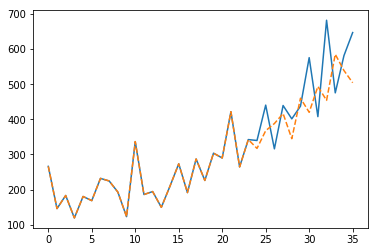

In [49]:
#Plot the time series and forecasts
predict_plot_data = np.empty_like(raw_values)
predict_plot_data[:] = raw_values
predict_plot_data[-12:] = predictions

plt.plot(raw_values)
plt.plot(predict_plot_data,'--')
plt.show()

## LSTM - predict with LSTM

In [50]:
X, y = train_trimmed[:, 0:-1], train_trimmed[:, -1]
X = X.reshape(X.shape[0], 1, X.shape[1])
print(X.shape)
print('X:\n',X[:5])
print(n_batch, X.shape[1],X.shape[2])

(20, 1, 1)
X:
 [[[-0.496628  ]]

 [[ 0.17669274]]

 [[-0.21607769]]

 [[ 0.1891017 ]]

 [[-0.1917993 ]]]
4 1 1


In [0]:
input_shape = (n_batch, X.shape[1], X.shape[2])
def make_model_lstm(n_batch,n_neurons):
    model = Sequential()
    model.add(LSTM(n_neurons, batch_input_shape=input_shape, stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
lstm_model=make_model_lstm(n_batch,n_neurons)
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [52]:
lstm_model.fit(X, y, epochs=n_epochs, batch_size=n_batch, verbose=1, shuffle=False)

Epoch 1/1000
20/20 [==============================] - 1s 30ms/step - loss: 0.2150
Epoch 2/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2248
Epoch 3/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2233
Epoch 4/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2210
Epoch 5/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2188
Epoch 6/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2167
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2149
Epoch 8/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2132
Epoch 9/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2117
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2104
Epoch 11/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2093
Epoch 12/1000
20/20 [==============================] - 0s 1ms/step - loss: 0.2082
Epoch 13/1000
20/20 [===

In [53]:
output = lstm_model.predict(test_reshaped, batch_size=n_batch)
print('Output: \n',output)

Output: 
 [[-0.45382312]
 [-0.13090417]
 [-0.4661922 ]
 [ 0.27115357]
 [-0.65725595]
 [ 0.02981776]
 [ 0.08509451]
 [-0.18743888]
 [ 0.23251468]
 [-1.1276958 ]
 [ 0.30433547]
 [-0.58566064]]


In [54]:
lstm_predictions = list()
for i in range(len(output)):
    yhat = output[i, 0]
    X = test_scaled[i, 0:-1]
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled) + 1 - i)
    # store forecast
    lstm_predictions.append(yhat)
print('Raw values and predictions:\n',np.column_stack((raw_values[-12:],
                                                       predictions,
                                                       lstm_predictions)))

Raw values and predictions:
 [[339.7        317.1511448  286.43388482]
 [440.4        367.59897524 343.68691248]
 [315.9        387.9379804  382.24127835]
 [439.3        416.42816184 394.40831406]
 [401.3        344.86976563 345.72761011]
 [437.4        460.13045605 435.07672181]
 [575.5        419.89445251 481.42226771]
 [407.6        493.51816079 569.00820444]
 [682.         453.89216559 478.94659583]
 [475.3        585.11319441 501.23158368]
 [581.3        538.83546496 559.95858029]
 [646.9        504.20450146 500.99780104]]


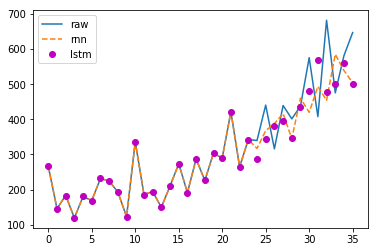

In [55]:
predict_plot_data=np.empty_like(raw_values)
predict_plot_data[:]=raw_values
predict_plot_data[-12:]=predictions

predict_lstm_plot_data=np.empty_like(raw_values)
predict_lstm_plot_data[:]=raw_values
predict_lstm_plot_data[-12:]=lstm_predictions

plt.plot(raw_values)
plt.plot(predict_plot_data,'--')
plt.plot(predict_lstm_plot_data,'mo')
plt.gca().legend(('raw','rnn','lstm'))
plt.show()